<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>

<h1>Resultados del Laboratorio 1</h1>
</center>

---

# Exploración de datos

<br/>
<font size='3'>En este laboratorio realizaremos un trabajo de exploración sobre un dataset dado. Hemos tomado como inspiración el siguiente kernel de Kaggle: [We are from our childhood](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood). 
<br/><br/>
El conjunto de datos utilizado son las respuestas de gente joven a una encuesta, con la que les proponemos trabajar. 
<br/><br/>
En esta notebook en particular, la autora visualiza distintos aspectos de los datos tratando de encontrar factores de variación relacionados a la respuesta “Crecí en la ciudad” o “Crecí en el campo”. La consigna para este laboratorio es realizar un trabajo similar, aunque más simple, analizando algunas de las variables provistas por la encuesta.
</font>

---

## Preparación del entorno

In [1]:
# Importamos librerías a utilizar:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import display, Markdown, HTML
from pylab import rcParams

In [2]:
pd.set_option('display.max_columns', 0)

In [3]:
# Cargamos los sets de datos:
responses_df = pd.read_csv('./datos/responses.csv')
# visualizamos los primeros 4 registros:
responses_df.head(4)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow


<br/>
# 1 - Estadisticas Descriptivas

## 1.1 - Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad:

#### Primero, visualizamos la descripcion general del dataset:

In [4]:
display( responses_df.describe() )

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,...,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,...,3.250743,2.952381,3.302579,3.297030,2.104270,3.343564,2.672294,3.475198,3.258449,3.597815,3.158209,2.963294,3.070717,3.621272,3.518849,3.014911,3.486111,3.521825,3.461768,3.031778,3.705765,3.633831,2.973161,3.292247,2.871769,3.592040,3.551142,3.265873,2.748509,3.023833,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099,1.184094,0.694700,1.411078,1.197951,0.779789,1.209489,1.311892,1.348266,1.181761,1.219436,1.133367,1.138633,1.236101,1.263523,1.258349,1.294456,1.352496,1.227098,0.920663,1.321766,1.347298,1.384127,...,1.075319,1.278387,1.483010,0.683148,1.031344,1.055348,1.002907,1.152425,1.044675,0.943806,1.093190,0.935689,1.172117,1.120903,1.103233,1.173834,1.092452,1.268173,1.118380,1.374644,0.824323,1.001617,1.222621,0.643436,1.243674,1.309913,1.170850,0.865736,1.101502,1.144365,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

Como se puede ver en la fila <b>count</b>, la cantida de valores por campo varía, lo que nos indica que existen valores nulos que pueden ensuciar la muestra. Será necesario limpiar segun los campos a evaluar.

#### Obtenemos la moda de los distintos campos:

In [5]:
display( responses_df.mode().dropna() ) 

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,5.0,1.0,1.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,5.0,1.0,4.0,5.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,3.0,3.0,2.0,1.0,1.0,5.0,3.0,1.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,few hours a day,3.0,3.0,3.0,3.0,3.0,2.0,4.0,19.0,170.0,60.0,1.0,female,right handed,secondary school,no,city,block of flats


<br/>
## Estadistica descriptiva de EDAD (Age):

A continuación se muestran los valores de media (mean), mediana (50%), desviación estándar (std) mas otros datos (como cantidad de valores no nulos en count y valores de mínima y máxima) correspondiente sólo a Edad:

In [6]:
display( responses_df.Age.describe().to_frame() )

,Age
count,1003.000000
mean,20.433699
std,2.828840
min,15.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


Obtenemos el valor de moda (mode) correspondiente sólo a Edad:

In [7]:
display( responses_df.Age.mode().to_frame('Age') ) 

,Age
0,19.0


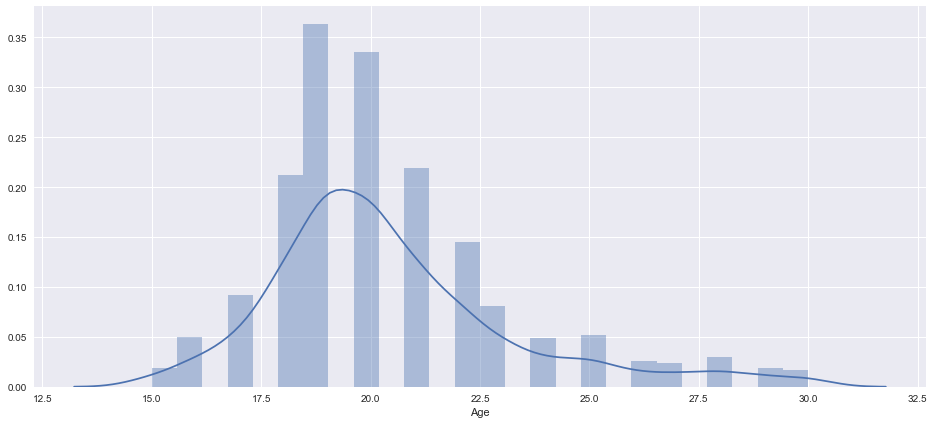

In [8]:
rcParams['figure.figsize'] = 16, 7
sns.distplot(responses_df.Age.dropna());

In [9]:
display( HTML('<br/><font size=4>De lo anterior podemos decir que la <b>Edad</b> relevada posee una <b>moda</b> de <b>'+ '${:,.2f}'.format(responses_df.Age.mode().values[0])  + 
              '</b> años, una <b>media</b> de <b>'+ '${:,.2f}'.format((responses_df.Age.mean())) + 
              '</b> años, una <b>mediana</b> de <b>'+ '${:,.2f}'.format((responses_df.Age.median())) + 
              '</b> años, una <b>desviación estándar</b> de <b>'+ '${:,.2f}'.format((responses_df.Age.std())) + ' </b>años</font><br/>' ) ) 

<br/>
## Estadistica descriptiva de PESO (Weight):

A continuación se muestran los valores de media (mean), mediana (50%), desviación estándar (std), mas otros datos (como cantidad de valores no nulos en count y valores de mínima y máxima) correspondiente sólo a Peso:

In [10]:
display( responses_df.Weight.describe().to_frame() )

,Weight
count,990.000000
mean,66.405051
std,13.839561
min,41.000000
25%,55.000000
50%,64.000000
75%,75.000000
max,165.000000


Obtenemos el valor de moda (mode) correspondiente sólo a Peso:

In [11]:
display( responses_df.Weight.mode().to_frame('Weight') ) 

,Weight
0,60.0


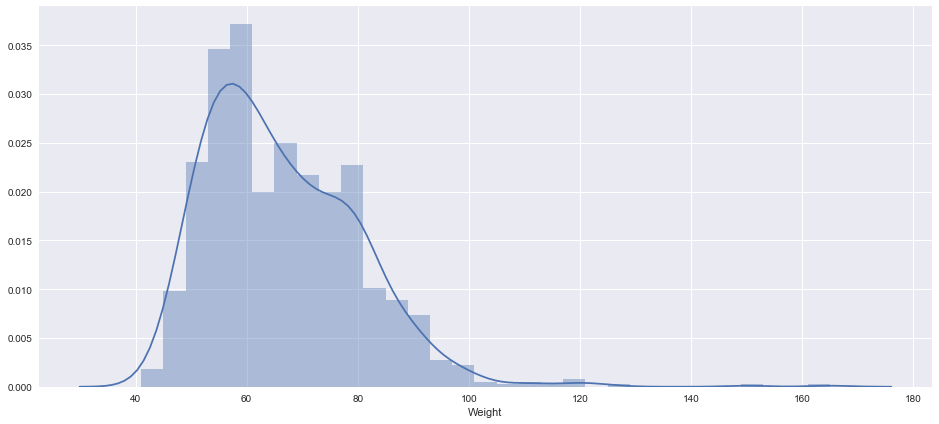

In [12]:
rcParams['figure.figsize'] = 16, 7
sns.distplot(responses_df.Weight.dropna());

In [13]:
display( HTML('<br/><font size=4>De lo anterior podemos decir que el <b>Peso</b> relevado posee una <b>moda</b> de <b>'+ '${:,.2f}'.format(responses_df.Weight.mode().values[0]) + 
              '</b>kg, una <b>media</b> de <b>'+ '${:,.2f}'.format((responses_df.Weight.mean())) + 
              '</b>kg, una <b>mediana</b> de <b>'+ '${:,.2f}'.format((responses_df.Weight.median())) + 
              '</b>kg, una <b>desviación estándar</b> de <b>'+ '${:,.2f}'.format((responses_df.Weight.std())) + '</b>kg</font><br/>' ) ) 

<br/>
## 1.2 - ¿Responden a alguna distribución conocida?

Responden a la distribución <b>ji-cuadrada</b> o <b>chi-cudrada</b> dado que ninguna de las variables no toma valores negativos, y su curva no es simétrica sino que está sesgada hacia la derecha.  

<br/>
## 1.3 - Realizar un análisis de outliers

Realizaremos el analisis y limpieza de outliers para poder visualizar mejor los gráficos. Comenzaremos con el analisis de la Edad y luego con el de Peso.

### EDADES: Análisis de Outliers

Visualizaremos los outliers en un gráfico de boxplot, ya que rapidamente el diagrama de caja y bigotes nos permiten ver los valores atípicos (puntos) fuera de los bigotes (brazos) del gráfico:

In [14]:
ages = responses_df.Age.dropna()

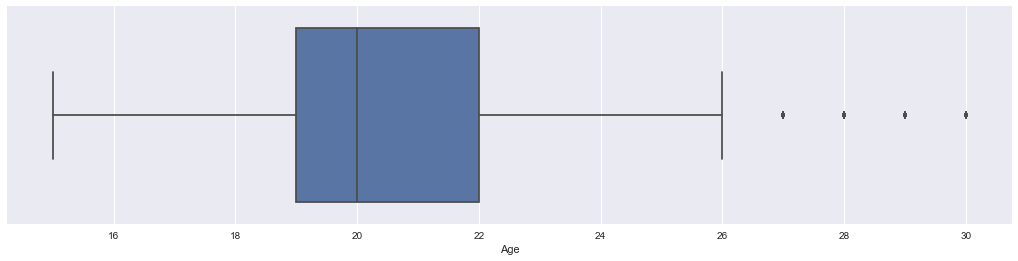

In [15]:
rcParams['figure.figsize'] = 18, 4
sns.boxplot(ages);

Se puede visualizar que existen valores outliers a la derecha de la serie.

Para remover los outliers vamos a aplicar el método de Tukey para detectar valores atípicos:

,Age
count,951.000000
mean,20.002103
std,2.186561
min,15.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,26.000000


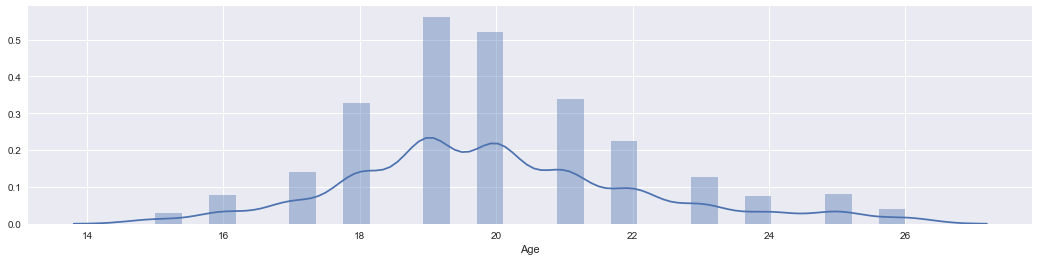

In [16]:
# Obtenemos los quartiles al 25% (q1) y al 75% (q4):
ages_q1 = ages.quantile(q=0.25)
ages_q4 = ages.quantile(q=0.75)

# Obtenemos el rango intercuartil (RIC) como la diferencia de q4 menos q1: 
ages_iqr = ages_q4 - ages_q1

# Obtenemos los valores minimos y maximos del rango, fuera de estos estan los outliers:
# Calculamos el mínimo como q1 menos (IRC*1.5) y el máximo como q4 mas (RIC*1.5)
ages_min = ages_q1 - (ages_iqr*1.5)
ages_max = ages_q4 + (ages_iqr*1.5)

# Obtenemos los valores que se encuentran dentro del rango:
ages_in_range = responses_df[responses_df.Age.between(ages_min,ages_max)].Age

display(HTML('<br/>Visualizamos el resultado de la limpieza:'))

display(HTML('<H4>Edades - Descripción de la serie de Edades sin outliers:</h4>'))
display(ages_in_range.describe().to_frame())

display(HTML('<H4>Edades - Histograma de los valores de la serie sin outliers:</h4>'))
sns.distplot(ages_in_range);



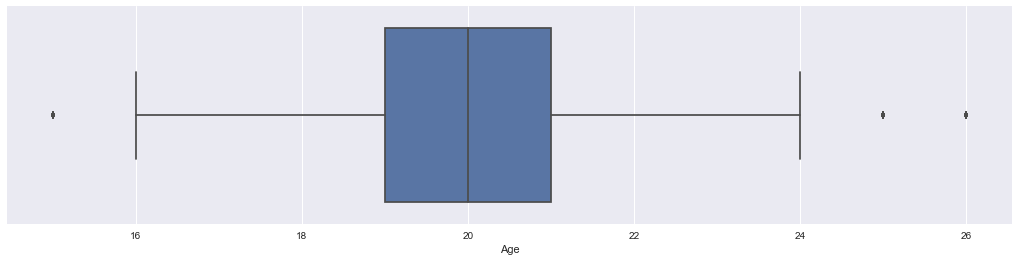

In [17]:
display(HTML('<H4>EDADES - Boxplot de la serie:</h4>'))
sns.boxplot(ages_in_range);

### PESOS: Análisis de Outliers

In [18]:
weights = responses_df.Weight.dropna()

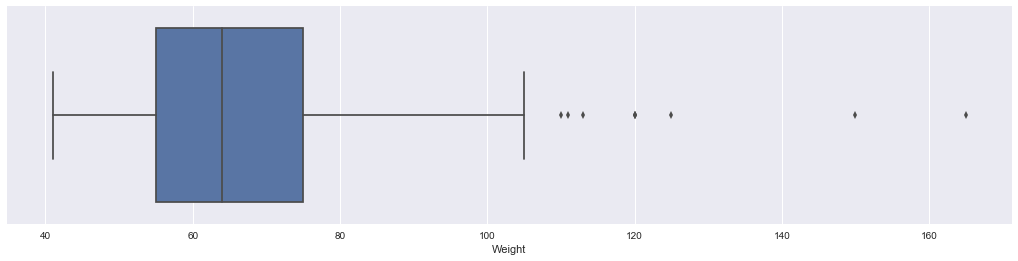

In [19]:
rcParams['figure.figsize'] = 18, 4
sns.boxplot(weights);

Se puede visualizar que existen valores outliers muy a la derecha de la serie.

Aplicamos Tukey a los Pesos de la misma manera que realizamos en Edades:


,Weight
count,981.000000
mean,65.858308
std,12.548409
min,41.000000
25%,55.000000
50%,64.000000
75%,75.000000
max,105.000000


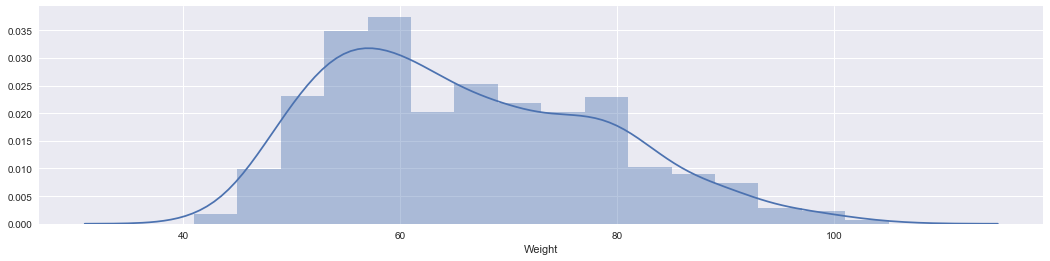

In [20]:
# Obtenemos los quartiles al 25% (q1) y al 75% (q4):
weights_q1 = weights.quantile(q=0.25)
weights_q4 = weights.quantile(q=0.75)

# Obtenemos el rango intercuartil (RIC) como la diferencia de q4 menos q1: 
weights_iqr = weights_q4 - weights_q1

# Obtenemos los valores minimos y maximos del rango, fuera de estos estan los outliers:
# Calculamos el mínimo como q1 menos (IRC*1.5) y el máximo como q4 mas (RIC*1.5)
weights_min = weights_q1 - (weights_iqr*1.5)
weights_max = weights_q4 + (weights_iqr*1.5)

# Obtenemos los valores que se encuentran dentro del rango:
weights_in_range = responses_df[responses_df.Weight.between(weights_min,weights_max)].Weight

display(HTML('<br/>Visualizamos el resultado de la limpieza:'))

display(HTML('<H4>Pesos - Descripción de la serie de Pesos sin outliers:</h4>'))
display(weights_in_range.describe().to_frame())

display(HTML('<H4>Pesos - Histograma de los valores de la serie sin outliers:</h4>'))
sns.distplot(weights_in_range);

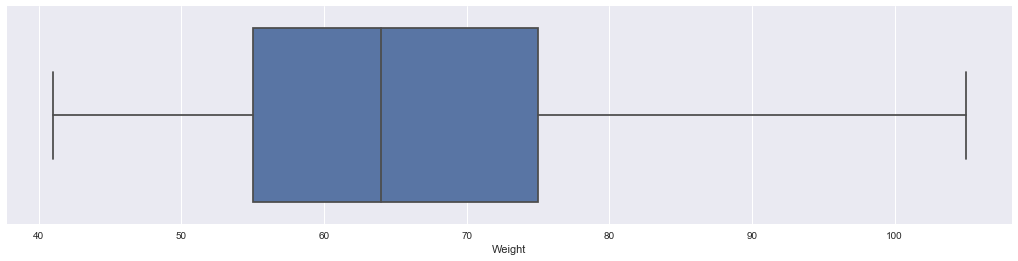

In [21]:
display(HTML('<H4>PESOS - Boxplot de la serie:</h4>'))
sns.boxplot(weights_in_range);

<h3>RESULTADO:</h3><br/>
Al analizar los outliers, vemos que la edad se asemaja un poco mas a una distribución normal aunque se presentan nuevos outliers. Con respecto al peso no sucede igual, a pesar de eliminarse los outliers sigue conservando una distribución chi-cuadrada.

# 1.4.1 - Métricas cuando desglosamos por género

In [22]:
# Declararemos una funcion para utilizar mas adelante
def remove_outliers(df):
    # Obtenemos los quartiles al 25% (q1) y al 75% (q4):
    q1 = df.quantile(q=0.25)
    q4 = df.quantile(q=0.75)
    # Obtenemos el rango intercuartil (RIC) como la diferencia de q4 menos q1: 
    iqr = q4 - q1
    # Obtenemos los valores minimos y maximos del rango, fuera de estos estan los outliers:
    # Calculamos el mínimo como q1 menos (IRC*1.5) y el máximo como q4 mas (RIC*1.5)
    vmin =q1 - (iqr*1.5)
    vmax =q4 + (iqr*1.5)
    # Obtenemos los valores que se encuentran dentro del rango:
    in_range = df[df.between(vmin,vmax)]

    return in_range

## Visualizamos la cantidad de registros por valor:

In [23]:
responses_df.Gender.value_counts(dropna=False).to_frame()

,Gender
female,593
male,411
NaN,6


Filtramos el dataframe original para obtener los datos segregados por género:

In [24]:
women_df = responses_df[responses_df['Gender'] == 'female'][['Age', 'Weight']] 
men_df = responses_df[responses_df['Gender'] == 'male'][['Age', 'Weight']]

Describimos ambos datasets:

In [25]:
women_df.describe() 

,Age,Weight
count,589.000000,580.000000
mean,20.113752,58.963793
std,2.792537,10.005719
min,15.000000,41.000000
25%,18.000000,53.000000
50%,20.000000,57.000000
75%,21.000000,63.000000
max,30.000000,165.000000


In [26]:
men_df.describe()

,Age,Weight
count,409.000000,405.000000
mean,20.872861,77.088889
std,2.796789,11.349838
min,15.000000,53.000000
25%,19.000000,70.000000
50%,20.000000,77.000000
75%,22.000000,83.000000
max,30.000000,150.000000


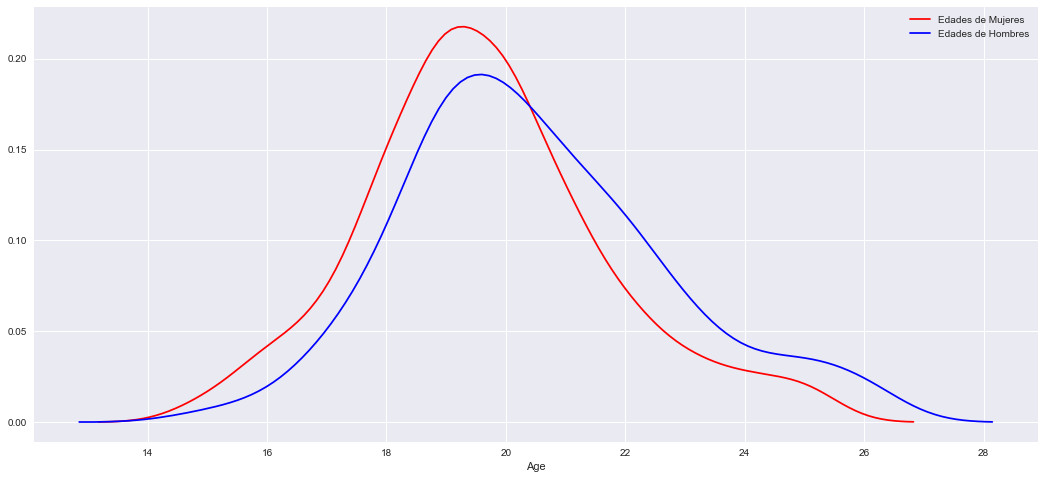

In [27]:
rcParams['figure.figsize'] = 18, 8
display(HTML('<H3>Edades</h3>'))
sns.distplot(remove_outliers(women_df['Age'].dropna()), hist=False, color='red', label='Edades de Mujeres');
sns.distplot(remove_outliers(men_df['Age'].dropna()), hist=False, color='blue', label='Edades de Hombres');

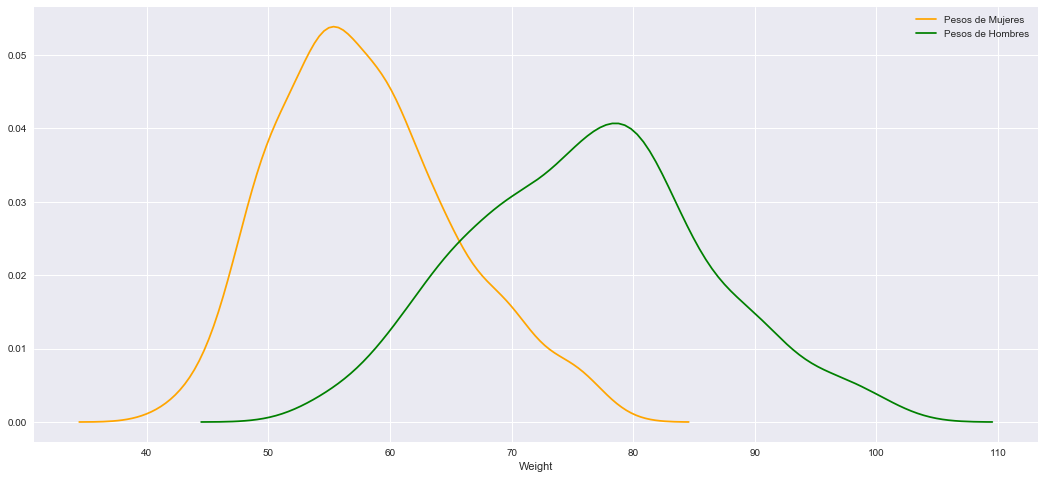

In [28]:
rcParams['figure.figsize'] = 18, 8
display(HTML('<H3>Pesos</h3>'))
sns.distplot(remove_outliers(women_df['Weight'].dropna()), hist=False, color='orange', label='Pesos de Mujeres');
sns.distplot(remove_outliers(men_df['Weight'].dropna()), hist=False, color='green', label='Pesos de Hombres');

## 1.4.2 - ¿Responden a alguna distribución conocida? 

Al estar presentadas de esta forma, se asemejan mas a una distribución normal.

## 1.4.3 - Comparar cualitativamente y gráficamente ambas distribuciones

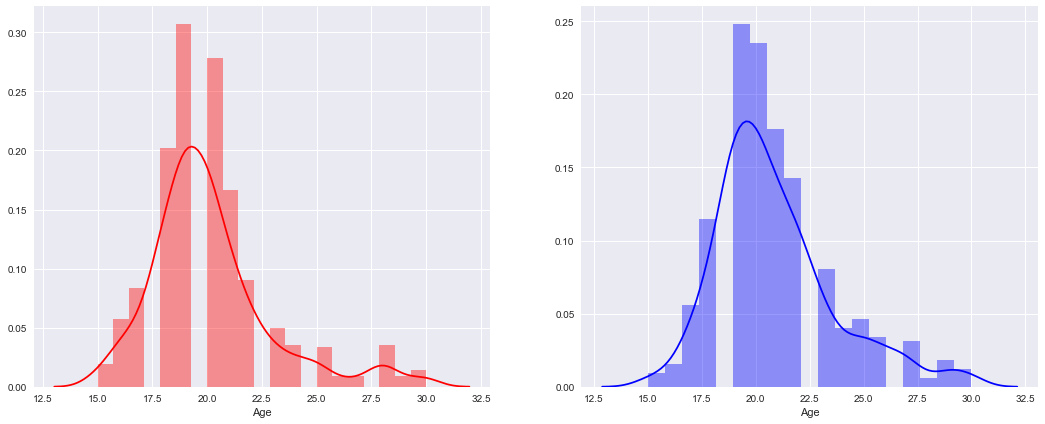

In [39]:
display(HTML('<H4>Comparativa entre Edades de Hombres y Mujeres</H4>'))
_, ax=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
sns.distplot(men_df.Age.dropna(),ax=ax[1],color="blue")
sns.distplot(women_df.Age.dropna(),ax=ax[0],color="red")

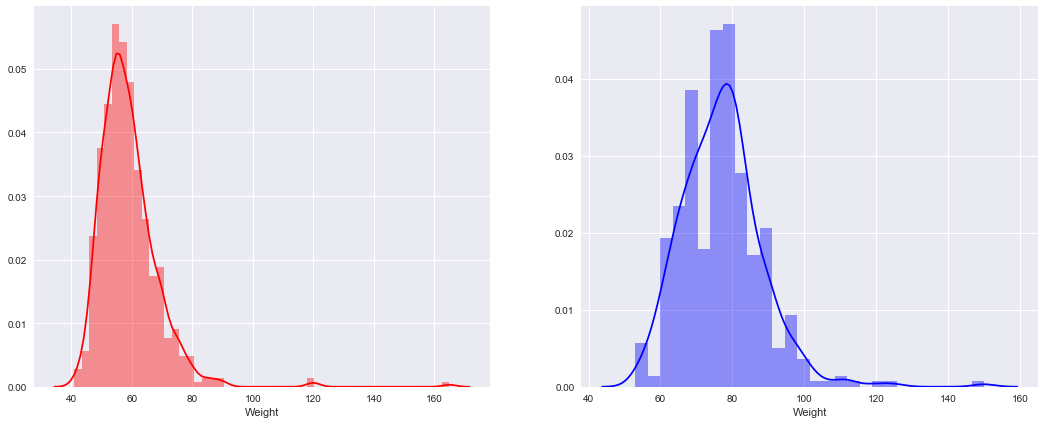

In [40]:
display(HTML('<H4>Comparativa entre Pesos de Hombres y Mujeres</H4>'))
_, ax=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
sns.distplot(men_df.Weight.dropna(),ax=ax[1],color="blue")
sns.distplot(women_df.Weight.dropna(),ax=ax[0],color="red")

## 1.4.4 - Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto

In [75]:
correlacionw_df = women_df[ ['Age', 'Weight'] ].corr()
correlacionw_df 

,Age,Weight
Age,1.000000,0.156477
Weight,0.156477,1.000000


In [77]:
correlacionm_df = men_df[ ['Age', 'Weight'] ].corr()
correlacionm_df 

,Age,Weight
Age,1.000000,0.253514
Weight,0.253514,1.000000


Conclusión: La correlación entre Altura y Peso tanto en mujeres (15%) como en hombres (25%) es baja, por lo que no se visualiza una correlación marcada entre ambas variables.

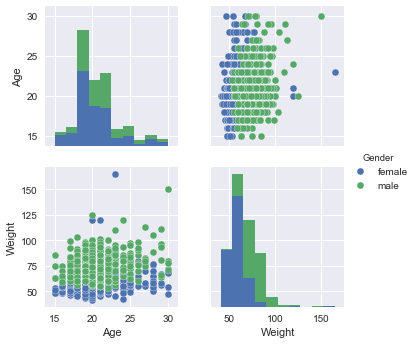

In [73]:
vars_df = responses_df[ ['Age', 'Weight', 'Gender'] ].dropna()
sns.pairplot(vars_df.dropna(), hue='Gender')
sns.plt.show()

---

# 2 - Probabilidad Marginal y Conjunta

### 2.1 - Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

In [97]:
vars_df = responses_df[ ['Alcohol', 'Smoking'] ] 

<h3>Probabilidad Marginal:</h3>

<h3>Probabilidad Conjunta:</h3>

In [103]:
pd.crosstab(index=vars_df['Alcohol'], columns=vars_df['Smoking'], margins=True, normalize=True)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,0.078,0.055,0.015,0.072,0.220
never,0.011,0.011,0.061,0.039,0.122
social drinker,0.099,0.109,0.131,0.319,0.658
All,0.188,0.175,0.207,0.430,1.000


<h3>Correlacion entre las dos variables:</h3>

### 2.2 - Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

---

# 3 - Preguntas finales:

## 3.1 - ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? 

## 3.2 - Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

---

## Pregunta: ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

---